In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from nltk.tokenize import word_tokenize

In [2]:
# load table to dataframe
market_df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [3]:
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [4]:
# create association rule transactions
transactions = []
# add data to transactions
for i in range(market_df.shape[0]):
    temp = []
    for j in range(market_df.shape[1]):
        if str(market_df.values[i, j]) != 'nan':
            temp.append(str(market_df.values[i, j]))
    transactions.append(temp)



In [5]:
# creat word cloud
all_words = ' '.join('%s' %item for item in transactions)

根据词频，开始生成词云!


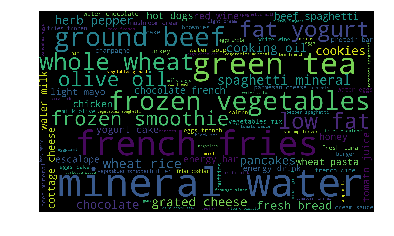

In [6]:
create_word_cloud(all_words)

In [7]:
from collections import Counter
import itertools

In [8]:
# count all values in market and get top 10
word_count = dict(Counter([x for j in transactions for x in j]))
word_count = sorted(word_count.items(), key = lambda x:x[1], reverse=True)
top_10 = [e[0] for e in word_count[:10]]

根据词频，开始生成词云!


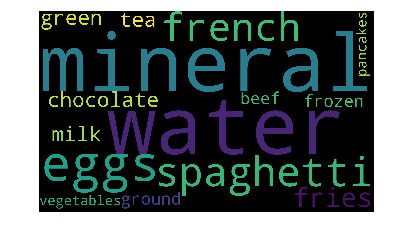

In [9]:
# creat word cloud
create_word_cloud(' '.join('%s' %w for w in top_10))